# Matilde Armageddon Presentation


In [3]:
%matplotlib inline
import armageddon
import matplotlib.pyplot as plt
import numpy as np

Our solve_atmospheric_entry uses Runge Kutta 34 to determine the numerical solution to the given problem.


```python

## Our solving routine

# The system of ODEs
def f(self, y, fragmented, density):
        # 0: velocity
        # 1: mass
        # 2: angle
        # 3: altitude
        # 4: distance
        # 5: radius
        f = np.zeros_like(y)
        f[0] = - (self.Cd * self.rhoa(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (self.g * np.sin(y[2]))
        f[1] = - (self.Ch * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * self.Q)
        f[2] = (self.g * np.cos(y[2])) / y[0]  - (self.Cl * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]) / (2 * y[1]) - (y[0] * np.cos(y[2])) / (self.Rp + y[3])
        f[3] = - y[0] * np.sin(y[2])
        f[4] = (y[0] * np.cos(y[2])) / (1 + y[3] / self.Rp)
        if fragmented == True:
            f[5] = np.sqrt(7/2 * self.alpha * self.rhoa(y[3]) / density) * y[0]
        else:
            f[5] = 0
        return f
    
# Runge_kutta
def runge_kutta(self, y, f, dt, fragmented, density):
        k1 = f(y, fragmented, density) * dt
        k2 = f(y+k1/2, fragmented, density) * dt
        k3 = f(y+k2/2, fragmented, density) * dt
        k4 = f(y+k3, fragmented, density) * dt

        y = y + (k1 + 2 * (k2 + k3) + k4) / 6
        return y
```

In [4]:
# Defining earth atmosphere with exponential atmospheric pressure
earth = armageddon.Planet(atmos_func='exponential')

# Get impact information for a given set of input parameters
radius = 10      # of the asteroid - assuming sphere
velocity = 20e3  # entry velocity of the asteroid
density = 3000   # density of the asteroid in kg/m^3
strength = 1e5   # strength of the asteroid - to determine asteroid fragmentation during atmospheric entry
angle = 45       # angle of entry

df, dic = earth.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3, dt=0.05, radians=False,
               fragmentation=True, num_scheme='RK', ensemble=False)

df # numerical solution given initial conditions

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,20000.000000,1.256637e+07,45.000000,100000.000000,0.000000,10.000000,0.00,0.000000
1,20000.345651,1.256637e+07,44.994732,99292.919615,696.255523,10.000000,0.05,0.000000
2,20000.691162,1.256636e+07,44.989463,98585.892041,1392.663189,10.000000,0.10,0.000000
3,20001.036523,1.256636e+07,44.984192,97878.917308,2089.223034,10.000000,0.15,0.000000
4,20001.381723,1.256636e+07,44.978921,97171.995445,2785.935090,10.000000,0.20,0.000000
5,20001.726751,1.256635e+07,44.973647,96465.126483,3482.799393,10.000000,0.25,0.000000
6,20002.071593,1.256635e+07,44.968373,95758.310452,4179.815975,10.000000,0.30,0.000000
7,20002.416234,1.256634e+07,44.963097,95051.547383,4876.984870,10.000000,0.35,0.000000
8,20002.760661,1.256634e+07,44.957820,94344.837308,5574.306110,10.000000,0.40,0.000000
9,20003.104854,1.256633e+07,44.952542,93638.180259,6271.779726,10.000000,0.45,0.000000


In [5]:
dic  # type of entry event with data analysis results

{'burst_peak_dedz': 66.35633152784206,
 'burst_altitude': 28377.75036629499,
 'burst_total_ke_lost': 442.0066685351022,
 'outcome': 'Airburst'}

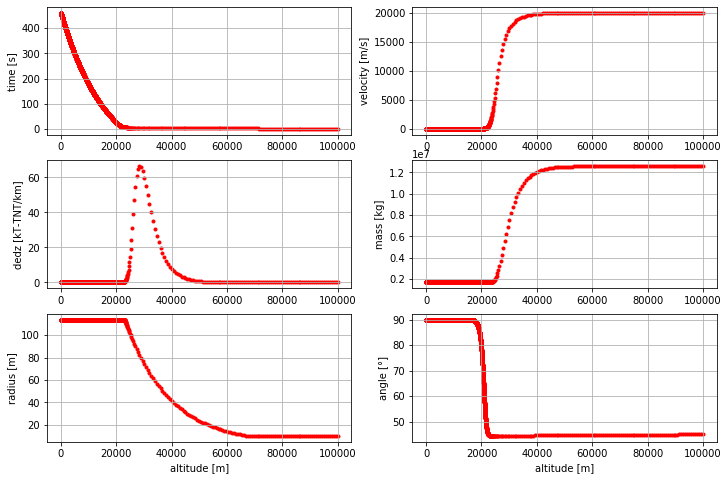

In [6]:
earth.plot_results(df)  # plot results

In [41]:
# Demonstration of accuracy

# Analytical vs Armageddon vs Scipy

import analytical
import scipy_test

radius = 10      # of the asteroid - assuming sphere
velocity = 20e3  # entry velocity of the asteroid
density = 3000   # density of the asteroid in kg/m^3
strength = 1e5   # strength of the asteroid - to determine asteroid fragmentation during atmospheric entry
angle = 45       # angle of entry

earth_anal = armageddon.Planet(atmos_func='exponential', g=0, Cl=0, Ch=0) # set assumptions required to compare with analytical solution

df, dic = earth_anal.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3, dt=0.05, radians=False,
               fragmentation=False, num_scheme='RK', ensemble=False) # Note fragmentation=False

anal_solution = analytical.anal_sol(H_plot=df.altitude, radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3)

sci_solution = scipy_test.sci_sol(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, init_altitude=100e3, dt=0.05, fragmentation=False,
                       num_scheme='RK45', C_H=0, C_L=0, g=0) # set assumptions required to compare with analytical solution


(0, 100000.0)

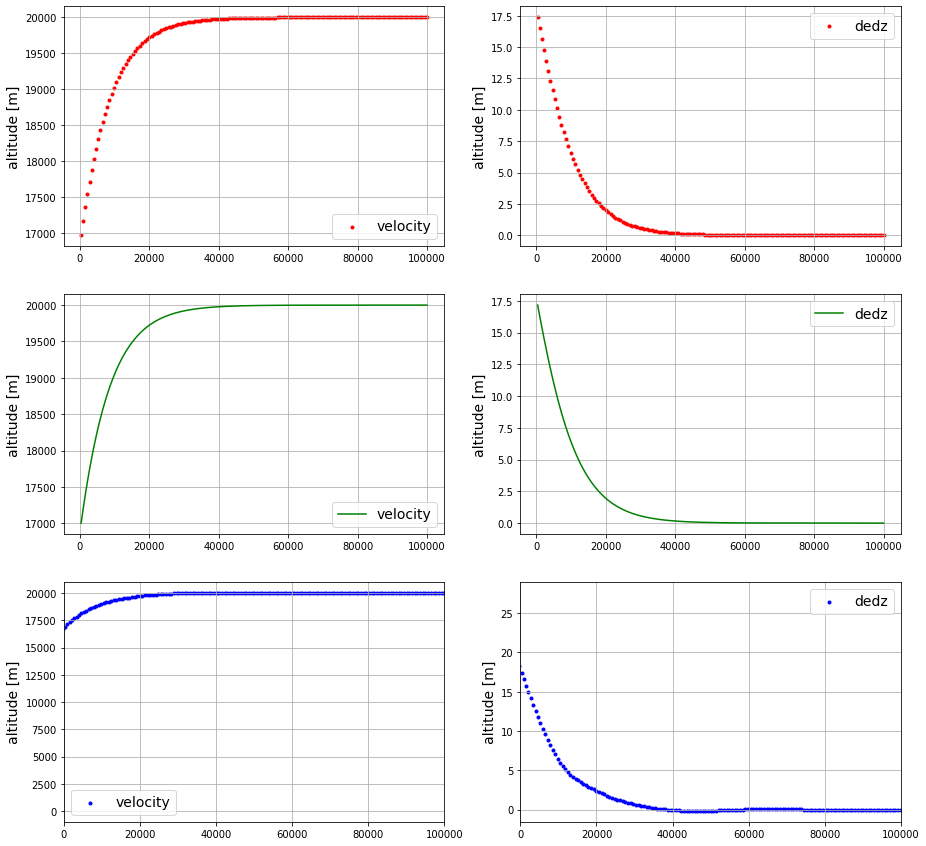

In [42]:
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

ax1.scatter(df.altitude, df.velocity, color='r', marker='.', label='velocity')
ax1.set_ylabel('altitude [m]', fontsize='14')
ax1.grid()
ax1.legend(fontsize='14')

ax2.scatter(df.altitude, df.dedz, color='r', marker='.', label='dedz')
ax2.set_ylabel('altitude [m]', fontsize='14')
ax2.grid()
ax2.legend(fontsize='14')

ax3.plot(anal_solution.altitude, anal_solution.velocity, color='g', label='velocity')
ax3.set_ylabel('altitude [m]', fontsize='14')
ax3.grid()
ax3.legend(fontsize='14')

ax4.plot(anal_solution.altitude, anal_solution.dedz, color='g', label='dedz')
ax4.set_ylabel('altitude [m]', fontsize='14')
ax4.grid()
ax4.legend(fontsize='14')

ax5.scatter(sci_solution.altitude, sci_solution.velocity, color='b', marker='.', label='velocity')
ax5.set_ylabel('altitude [m]', fontsize='14')
ax5.grid()
ax5.legend(fontsize='14')
ax5.set_xlim(0, 1e5)

ax6.scatter(sci_solution.altitude, sci_solution.dedz, color='b', marker='.', label='dedz')
ax6.set_ylabel('altitude [m]', fontsize='14')
ax6.grid()
ax6.legend(fontsize='14')
ax6.set_xlim(0, 1e5)

In [43]:
# RMS Analytical vs Armageddon

dts = [0.1, 0.05, 0.01, 0.005]
RMS = []
for dt in dts: 
    df, dic = earth_anal.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, # dt is inserted for timestep
               init_altitude=100e3, dt, radians=False,
               fragmentation=False, num_scheme='RK', ensemble=False) # Note fragmentation=False
    rms_velocity = np.sqrt(1/len(df) * (df.velocity - anal_solution.velocity)**2)

SyntaxError: invalid syntax (<ipython-input-43-0793da9417a0>, line 5)

In [39]:
# Demonstration of interpolation

In [1]:
# Define fiducial parameters for our ensemble calculation
fiducial_impact = {'radius': 10.0,
                   'angle': 45.0,
                   'strength': 100000.0,
                   'velocity': 21000.0,
                   'density': 3000.0}

# perform the ensemble 
ensemble = armageddon.ensemble.solve_ensemble(earth,
                                              fiducial_impact,
                                              variables=['radius','angle','strength','velocity','density'], radians=False,
                                              rmin=8, rmax=12)

NameError: name 'armageddon' is not defined

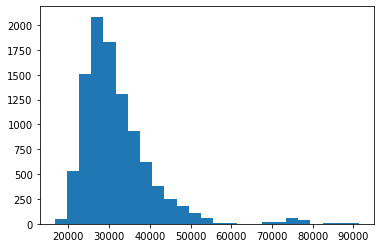

In [21]:
# get the burst altitude
burst_altitude = np.array(ensemble['burst_altitude']).astype('int')
# produce a histogram 
plt.hist(burst_altitude, 25)
plt.show()